In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import io

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
load_folder='drive/MyDrive/Neural/SSM/Neural Analysis/'
data=io.loadmat(load_folder+'chewie_CO_CS_BL_10212016_001_py_5ms')

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'go_time_rel', 'kinematics', 'move_time_rel', 'neural_data_M1', 'neural_data_PMd', 'target_id', 'target_time_rel'])

In [5]:
### You can access all the relevant data for trial "tr" in the following arrays within array[0,tr]
### For example the neural data from M1 for trial tr is in neural_data_M1[0,tr]

neural_data_M1=data['neural_data_M1'] 
neural_data_PMd=data['neural_data_PMd']
tgt_ids=data['target_id'] #Target location (numbers from 0-7 depending which of the 8 directions it was)
go_time_rel=data['go_time_rel'] #go cue time (in seconds) from the beginning of this trial's data
move_time_rel=data['move_time_rel'] #movement onset time (in seconds) from the beginning of this trial's data
tgt_time_rel=data['target_time_rel'] #target onset time (in seconds) from the beginning of this trial's data

kin=data['kinematics'] #kinematics (first 2 columns are position, next 2 are velocity, next next 2 are acceleration)

In [6]:
num_tr=neural_data_M1.shape[1] #number of trials
num_units_m1=neural_data_M1[0,0].shape[0] #number of M1 neurons
num_units_pmd=neural_data_PMd[0,0].shape[0] #number of PMd neurons

dt=.005 #size of neural time bins in seconds
kin_dt=.01 #size of kinematic time bins in seconds

37
259
519


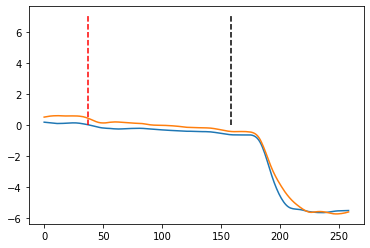

In [7]:
#Plot position for first trial
import random
#tr=random.randint(0,neural_data_M1.shape[1])
#print(tr)
tr = 4
go_cue_bin=int(go_time_rel[0,tr]/kin_dt)
move_bin=int(move_time_rel[0,tr]/kin_dt)

plt.plot(kin[0,tr][:,:2]) #Plot position
plt.plot([go_cue_bin,go_cue_bin],[0,7],'k--')
plt.plot([move_bin,move_bin],[0,7],'r--')
print(move_bin)
print(len(kin[0,tr]))
print(neural_data_M1[0,tr].shape[1])

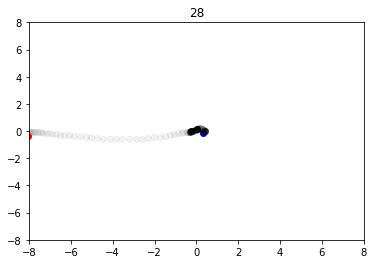

In [8]:
tr = random.randint(0,100)
x = kin[0,tr][:,0]
y = kin[0,tr][:,1]
plt.xlim(left = -8, right = 8)
plt.ylim(top = 8, bottom = -8)
plt.scatter(x[0], y[0], c = 'blue', alpha = 1 )
plt.scatter(x[1:-1],y[1:-1], color =  'black', alpha = 0.05 ) 
plt.scatter(x[-1], y[-1], c = 'red', alpha = 1 )
plt.title(tr)
plt.show()

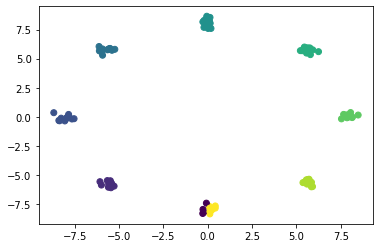

{-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

In [80]:
x = np.array([kin[0,tr][-1,0] for tr in range(100)])
y = np.array([kin[0,tr][-1,1] for tr in range(100)])
#color = [i for i in np.arccos(y/np.sqrt(x**2 + y**2))/(np.pi)*16]
color = [np.floor(i) for i in (np.arctan2(x,y)/np.pi+ 0.3)*4]
plt.scatter(x, y, c = color)
plt.show()
set(color)

In [30]:
np.arctan2()

{0, 2, 4, 6, 8}

array([ 0.82666536, -1.56460182,  1.53731314, -0.03972211,  0.79362459,
        0.78844065,  0.04432641, -0.77741953, -1.56994046, -0.7949465 ,
       -1.54625068,  0.77684842, -1.55652777,  0.01562178, -0.74829154,
        0.0168039 ,  0.81572706, -0.76851636, -0.80514365, -0.80140841,
        0.83334322,  0.77157781, -1.55978252, -0.0021526 , -0.01192043,
        1.55349402,  0.80880977, -0.7655343 ,  0.04542326,  1.55949977,
       -0.77902645,  1.54309637,  0.00272934,  1.56076767, -0.81354713,
        0.80576392, -0.75105401,  0.00716193, -0.00398116, -1.55551861,
        0.82433939,  0.02241159,  1.55567867,  0.79924916, -0.00939627,
       -0.75742421, -0.80201923,  1.56191587, -1.51560986,  0.82814848,
       -0.83680701, -0.78250537,  0.81460716,  0.0231525 ,  0.84800631,
       -0.7291505 ,  0.04257386, -0.76330242,  0.77757473, -1.55576994,
       -1.55982219, -0.791557  ,  0.0175851 , -1.56544143,  0.8179955 ,
       -0.81820469,  0.82660775, -1.53673191, -0.79377138, -0.79

In [ ]:
neural_data_M1[0,tr].shape

(84, 463)